# 📘 Financial Derivatives: Option Pricing and Delta Hedging
## **A Comprehensive Simulation Approach**

## **Introduction**
This notebook explores key concepts in **option pricing and delta hedging**, implemented through Monte Carlo simulations. The aim is to **model option prices, simulate hedging strategies, and analyze replicating portfolio errors**. We employ **the Black-Scholes model**, **geometric Brownian motion**, and **stochastic differential equations** to study financial derivatives.

## **💡 Key Objectives**
1️⃣ **Option Pricing with the Black-Scholes Model**  
   - Compute the theoretical price of a **European Call Option**.
   - Calculate the **Delta** of an option to assess hedging strategies.

2️⃣ **Delta Hedging via Monte Carlo Simulation**  
   - Simulate the **stock price path** using a **Wiener process (Brownian Motion)**.
   - Implement **dynamic hedging** with **continuous rebalancing**.
   - Compute **replicating portfolio values** and **hedging errors**.

3️⃣ **Statistical Analysis of Hedging Performance**  
   - Run **multiple simulations** to analyze **mean replicating errors**.
   - Visualize **scatterplots of hedging errors vs. terminal stock prices**.
   - Compare performance across **different hedging frequencies** (`N = 12, 52, 252`).

---

## **📌 Overview of Notebook Sections**
| 🔢 Section | 📌 Description |
|------------|---------------|
| **1️⃣ Black-Scholes Model** | Compute theoretical option prices and delta. |
| **2️⃣ Delta Hedging Simulation** | Simulate a **stock price path** and apply a hedging strategy. |
| **3️⃣ Multiple Hedging Simulations** | Run **1000+ simulations** and analyze the mean replicating error. |

---

## **📈 Why This Matters**
📌 **Option pricing** and **delta hedging** are crucial in risk management for financial institutions and hedge funds. This notebook provides a **step-by-step breakdown of how traders hedge options dynamically** using **stochastic models**.

🚀 **Let's dive into the simulations!** 🎯


# 1️⃣ Black-Scholes Model for European Call Options 📈

## 🏆 Objective
In this section, we implement the **Black-Scholes Model** to price a **European call option** and compute its **delta sensitivity**.

## 📌 Theoretical Background
The **Black-Scholes formula** provides a closed-form solution for the price of a **European call option**, given by:

$$
C(S, t) = S N(d_1) - K e^{-rT} N(d_2)
$$

where:
- \( S \) = Current stock price  
- \( K \) = Strike price  
- \( T \) = Time to maturity  
- \( r \) = Risk-free interest rate  
- \( \sigma \) = Stock price volatility  
- \( N(d) \) = Cumulative normal distribution function  

with:

$$
d_1 = \frac{\ln(S/K) + (r + \frac{1}{2} \sigma^2)T}{\sigma \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T}
$$

## 📌 Option Greeks - Delta
The **delta** of a call option represents the **sensitivity of the option price** to small changes in the stock price:

$$
\Delta = N(d_1)
$$

It indicates how much the call option price is expected to change **for a $1 increase in the stock price**.

## 🔍 Why is this Important?
✅ **Used for option pricing in trading strategies.**  
✅ **Essential for risk management & hedging.**  
✅ **Foundational concept in financial derivatives pricing.**  

---
📊 **Let’s compute the Black-Scholes price and delta!** 🚀


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def black_scholes_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price of a European call option.
    
    Parameters:
    S : float  - Current stock price
    K : float  - Strike price
    T : float  - Time to maturity (in years)
    r : float  - Risk-free interest rate (annualized)
    sigma : float  - Volatility of the stock (annualized)
    
    Returns:
    float - Call option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_call_delta(S, K, T, r, sigma):
    """
    Compute the Black-Scholes delta of a European call option.
    
    Parameters:
    S : float  - Current stock price
    K : float  - Strike price
    T : float  - Time to maturity (in years)
    r : float  - Risk-free interest rate (annualized)
    sigma : float  - Volatility of the stock (annualized)
    
    Returns:
    float - Call option delta
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Example usage
S = 100  # Stock price
K = 100  # Strike price
T = 1    # Time to maturity (1 year)
r = 0.05  # Risk-free rate (5%)
sigma = 0.2  # Volatility (20%)

call_price = black_scholes_call_price(S, K, T, r, sigma)
delta = black_scholes_call_delta(S, K, T, r, sigma)

print(f"Black-Scholes Call Price: {call_price:.4f}")
print(f"Call Option Delta: {delta:.4f}") 


Black-Scholes Call Price: 10.4506
Call Option Delta: 0.6368


# 2️⃣ Delta Hedging Simulation for a European Call Option 🎯📈

## 🏆 Objective
This section simulates **delta hedging** for a **European call option**, using the **Black-Scholes model**.  
Delta hedging is a key strategy used to **minimize risk exposure** by dynamically adjusting the number of shares held in a portfolio.

## 📌 How Does Delta Hedging Work?
Delta hedging involves **continuously adjusting** the number of shares held in response to **changes in the option's delta**:

- If **Delta ↑**, buy more shares 📈.
- If **Delta ↓**, sell shares 📉.
- Adjustments are made at **each time step** to replicate the option's value.

## 🔢 **Mathematical Formulation**
The delta at each time step is computed using the **Black-Scholes formula**:

$$
\Delta = N\left( d_1 \right)
$$

where:

$$
d_1 = \frac{\ln(S/K) + (r + \frac{1}{2} \sigma^2) (T - t)}{\sigma \sqrt{T - t}}
$$

and:

- \( S \) = Stock price
- \( K \) = Strike price
- \( r \) = Risk-free rate
- \( \sigma \) = Volatility
- \( T \) = Time to expiry

At **each step**, we update:
- **Cash balance** 📉💰
- **Shares held** 📊
- **Portfolio value** 💹

## 🔍 Why is This Important?
✅ **Used in trading desks & risk management** for maintaining neutral exposure.  
✅ **Minimizes portfolio risk** due to stock price fluctuations.  
✅ **Core strategy in options market making**.  

---
📊 **Let’s simulate delta hedging and visualize the results!** 🚀


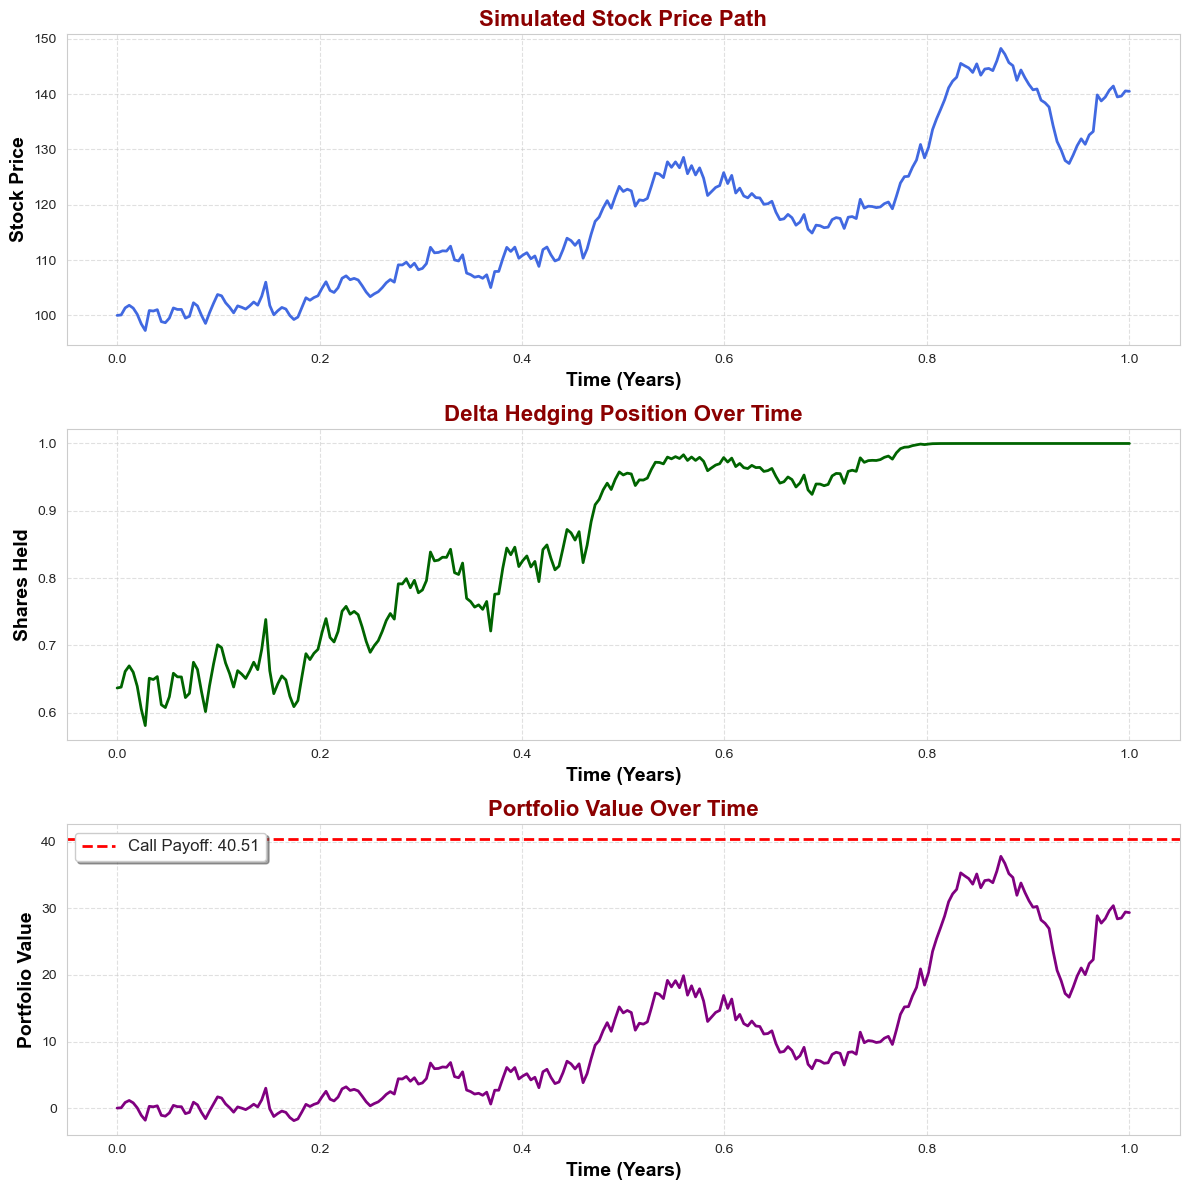

Final Portfolio Value: 29.3769
Call Option Payoff: 40.5102
Replicating Error: -11.1333


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def option_path_sim(K, S0, r, sigma, T, N):
    """
    Simulates delta hedging for a European call option using the Black-Scholes formula.
    
    Parameters:
    K : float  - Strike price
    S0 : float  - Initial stock price
    r : float  - Risk-free interest rate
    sigma : float  - Volatility
    T : float  - Time to expiry
    N : int  - Number of hedging steps per year
    
    Returns:
    tuple - (Stock price path, Call option payoff, Shares held, Cash balance, Portfolio value, Replicating error)
    """
    dt = T / N  # Time step
    t = np.linspace(0, T, N+1)  # Time grid
    
    # Simulating stock price path using geometric Brownian motion
    dW = np.random.randn(N) * np.sqrt(dt)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0)  # Insert W(0) = 0
    S = S0 * np.exp((r - 0.5 * sigma**2) * t + sigma * W)
    
    # Initialize hedging portfolio
    cash = 0
    shares_held = np.zeros(N+1)
    portfolio_value = np.zeros(N+1)
    
    for i in range(N+1):
        delta = norm.cdf((np.log(S[i] / K) + (r + 0.5 * sigma**2) * (T - t[i])) / (sigma * np.sqrt(T - t[i] + 1e-8)))
        if i == 0:
            shares_held[i] = delta
            cash -= delta * S[i]
        else:
            shares_held[i] = delta
            cash = cash * np.exp(r * dt) - (shares_held[i] - shares_held[i-1]) * S[i]
        portfolio_value[i] = shares_held[i] * S[i] + cash
    
    call_payoff = max(S[-1] - K, 0)
    replicating_error = portfolio_value[-1] - call_payoff
    
    return S, shares_held, portfolio_value, call_payoff, replicating_error, t

# Run simulation
S, shares_held, portfolio_value, call_payoff, replicating_error, t = option_path_sim(K=100, S0=100, r=0.05, sigma=0.2, T=1, N=252)

sns.set_style("whitegrid")

# Create a figure with subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# 1️⃣ Stock Price Path
ax[0].plot(t, S, linewidth=2, color='royalblue')
ax[0].set_title("Simulated Stock Price Path", fontsize=16, fontweight='bold', color='darkred')
ax[0].set_xlabel("Time (Years)", fontsize=14, fontweight='bold', color='black')
ax[0].set_ylabel("Stock Price", fontsize=14, fontweight='bold', color='black')
ax[0].grid(True, linestyle="--", alpha=0.6)

# 2️⃣ Delta Hedging Position Over Time
ax[1].plot(t, shares_held, linewidth=2, color='darkgreen')
ax[1].set_title("Delta Hedging Position Over Time", fontsize=16, fontweight='bold', color='darkred')
ax[1].set_xlabel("Time (Years)", fontsize=14, fontweight='bold', color='black')
ax[1].set_ylabel("Shares Held", fontsize=14, fontweight='bold', color='black')
ax[1].grid(True, linestyle="--", alpha=0.6)

# 3️⃣ Portfolio Value Over Time
ax[2].plot(t, portfolio_value, linewidth=2, color='purple')
ax[2].axhline(call_payoff, color='red', linestyle='dashed', linewidth=2, label=f"Call Payoff: {call_payoff:.2f}")
ax[2].set_title("Portfolio Value Over Time", fontsize=16, fontweight='bold', color='darkred')
ax[2].set_xlabel("Time (Years)", fontsize=14, fontweight='bold', color='black')
ax[2].set_ylabel("Portfolio Value", fontsize=14, fontweight='bold', color='black')
ax[2].grid(True, linestyle="--", alpha=0.6)
ax[2].legend(fontsize=12, loc='upper left', frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()

# Print final results
print(f"Final Portfolio Value: {portfolio_value[-1]:.4f}")
print(f"Call Option Payoff: {call_payoff:.4f}")
print(f"Replicating Error: {replicating_error:.4f}")


# 3️⃣ Monte Carlo Simulation for Delta Hedging Analysis 🎲📈

## 🏆 Objective
This section extends our **delta hedging** simulation by running a **Monte Carlo analysis** over **multiple paths**.  
We analyze the **mean replicating error** to evaluate the effectiveness of the hedging strategy.

## 📌 What is Monte Carlo Simulation?
Monte Carlo simulations use **random sampling** to model outcomes of stochastic processes.  
In this case, we simulate **1,000 independent stock price paths** and evaluate the accuracy of our **delta hedging** approach.

## 🔢 **Mathematical Formulation**
For each simulation \( i \), we compute the **replicating error**:

$$
\text{Error}_i = V_T^i - \max(S_T^i - K, 0)
$$

where:
- \( V_T^i \) = **Final portfolio value at expiration**.
- \( S_T^i \) = **Terminal stock price**.
- \( K \) = **Strike price**.
- \( P \) = **Number of simulated paths**.

The mean replicating error is given by:

$$
\mathbb{E}[\text{Error}] = \frac{1}{P} \sum_{i=1}^{P} \text{Error}_i
$$

## 📊 Interpretation of Results
1. **A mean replicating error close to 0** → Suggests that the delta hedging strategy **accurately replicates the option payoff**.  
2. **A large mean error** → Implies **inefficiencies in the hedging strategy**, potentially due to large price jumps or model assumptions.  
3. **The histogram of replicating errors** → Provides insights into the **distribution of errors** and hedging performance.

## 🔍 Why is This Important?
✅ **Evaluates the performance of delta hedging over multiple price paths**.  
✅ **Quantifies how well the portfolio replicates the option payoff**.  
✅ **Helps traders improve risk management strategies**.  

---
📊 **Let’s run 1,000 simulations and analyze the mean replicating error!** 🚀


Mean Replicating Error over 1000 paths: -11.0024


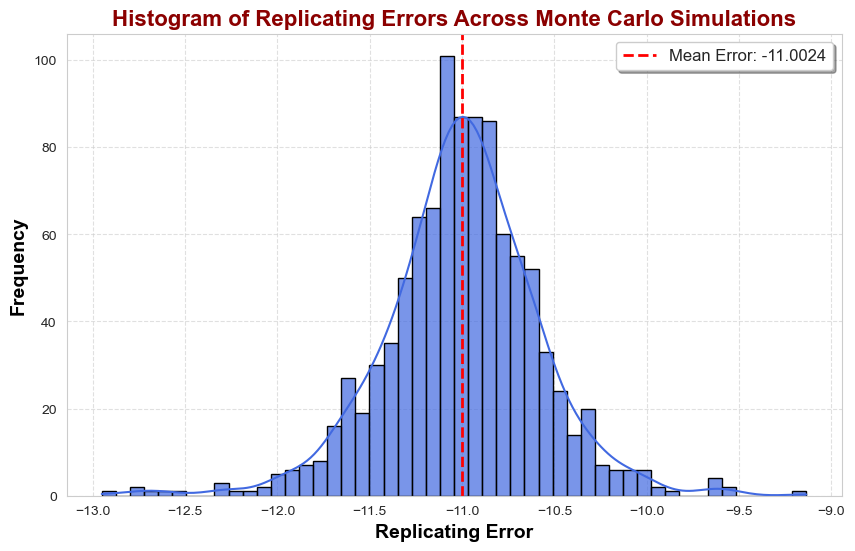

In [ ]:
def option_path_sim(K, S0, r, sigma, T, N):
    """
    Simulates delta hedging for a European call option using the Black-Scholes formula.
    
    Parameters:
    K : float  - Strike price
    S0 : float  - Initial stock price
    r : float  - Risk-free interest rate
    sigma : float  - Volatility
    T : float  - Time to expiry
    N : int  - Number of hedging steps per year
    
    Returns:
    tuple - (Stock price path, Call option payoff, Shares held, Cash balance, Portfolio value, Replicating error)
    """
    dt = T / N  # Time step
    t = np.linspace(0, T, N+1)  # Time grid
    
    # Simulating stock price path using geometric Brownian motion
    dW = np.random.randn(N) * np.sqrt(dt)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0)  # Insert W(0) = 0
    S = S0 * np.exp((r - 0.5 * sigma**2) * t + sigma * W)
    
    # Initialize hedging portfolio
    cash = 0
    shares_held = np.zeros(N+1)
    portfolio_value = np.zeros(N+1)
    
    for i in range(N+1):
        delta = norm.cdf((np.log(S[i] / K) + (r + 0.5 * sigma**2) * (T - t[i])) / (sigma * np.sqrt(T - t[i] + 1e-8)))
        if i == 0:
            shares_held[i] = delta
            cash -= delta * S[i]
        else:
            shares_held[i] = delta
            cash = cash * np.exp(r * dt) - (shares_held[i] - shares_held[i-1]) * S[i]
        portfolio_value[i] = shares_held[i] * S[i] + cash
    
    call_payoff = max(S[-1] - K, 0)
    replicating_error = portfolio_value[-1] - call_payoff
    
    return replicating_error

def option_sim(K, S0, r, sigma, T, N, P):
    """
    Runs multiple simulations of option_path_sim to analyze hedging results.
    
    Parameters:
    K : float  - Strike price
    S0 : float  - Initial stock price
    r : float  - Risk-free interest rate
    sigma : float  - Volatility
    T : float  - Time to expiry
    N : int  - Number of hedging steps per year
    P : int  - Number of Monte Carlo paths
    
    Returns:
    np.array - Simulation results containing replicating errors.
    """
    results = [option_path_sim(K, S0, r, sigma, T, N) for _ in range(P)]
    return np.array(results)

# Run Monte Carlo Simulation with 1,000 paths
P = 1000
sim_results = option_sim(K=100, S0=100, r=0.05, sigma=0.2, T=1, N=252, P=P)

# Extract replicating errors
mean_error = np.mean(sim_results)

# Print results
print(f"Mean Replicating Error over {P} paths: {mean_error:.4f}")

# 📊 Plot Histogram of Replicating Errors
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(sim_results, bins=50, kde=True, color='royalblue', alpha=0.7, edgecolor='black')

# Formatting the plot
plt.axvline(mean_error, color='red', linestyle='dashed', linewidth=2, label=f"Mean Error: {mean_error:.4f}")
plt.xlabel("Replicating Error", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Frequency", fontsize=14, fontweight='bold', color='black')
plt.title("Histogram of Replicating Errors Across Monte Carlo Simulations", fontsize=16, fontweight='bold', color='darkred')
plt.legend(fontsize=12, loc='upper right', frameon=True, shadow=True, fancybox=True)
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()
